In [1]:
from matplotlib import pyplot as plt
import numpy as np

import plotly.express as px

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap

In [2]:
from matplotlib import font_manager

font_dirs = ['/Users/saadesa/Downloads/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'CMU Sans Serif'

In [3]:
raw_data = np.loadtxt("prod_runs_lcm_1.txt")
data_lcm = {}

ngens_lcm = int(len(raw_data)/40)

for i in range(ngens_lcm):
    gen_name = "gen" + str(i)
    sliced_data = raw_data[40*i:40*(i+1)]
    idx = np.where(sliced_data[:, 4] > 100)
    sliced_data = np.delete(sliced_data, idx, axis=0)
    data_lcm[gen_name] = sliced_data

In [4]:
raw_data = np.loadtxt("prod_runs_vcm_1.txt")
data_vcm = {}

ngens_vcm = int(len(raw_data)/40)

for i in range(ngens_vcm):
    gen_name = "gen" + str(i)
    sliced_data = raw_data[40*i:40*(i+1)]
    idx = np.where(sliced_data[:, 4] > 100)
    sliced_data = np.delete(sliced_data, idx, axis=0)
    data_vcm[gen_name] = sliced_data

In [5]:
raw_data = np.loadtxt("prod_runs_hcm_1.txt")
data_hcm = {}

ngens_hcm = int(len(raw_data)/40)

for i in range(ngens_hcm):
    gen_name = "gen" + str(i)
    sliced_data = raw_data[40*i:40*(i+1)]
    idx = np.where(sliced_data[:, 4] > 100)
    sliced_data = np.delete(sliced_data, idx, axis=0)
    data_hcm[gen_name] = sliced_data

In [6]:
N = 256
blue = np.ones((N, 4))
blue[:, 0] = np.linspace(19/256, 1, N) # R = 19
blue[:, 1] = np.linspace(12/256, 1, N) # G = 12
blue[:, 2] = np.linspace(110/256, 1, N)  # B = 110
blue_cmp = ListedColormap(blue)

In [7]:
N = 256
green = np.ones((N, 4))
green[:, 0] = np.linspace(23/256, 1, N) # R = 23
green[:, 1] = np.linspace(130/256, 1, N) # G = 130
green[:, 2] = np.linspace(134/256, 1, N)  # B = 134
green_cmp = ListedColormap(green)

In [8]:
N = 256
red = np.ones((N, 4))
red[:, 0] = np.linspace(186/256, 1, N) # R = 186
red[:, 1] = np.linspace(82/256, 1, N) # G = 82
red[:, 2] = np.linspace(2/256, 1, N)  # B = 2
red_cmp = ListedColormap(red)

In [9]:
# %matplotlib notebook

# fig = plt.figure(figsize=(10,8))

# #marker_list = ['o', 'h', 'p', 's', '^' , 'P', '*']

# #plt.xlim([0,100])
# #plt.ylim([0,100])

# #cm = plt.cm.get_cmap('Blues')

# for i in range(ngens_lcm):
#     gen_name = "gen" + str(i)
#     T_star = data_lcm[gen_name][:, 5]/data_lcm[gen_name][:, 6]
#     time_off = (1 - data_lcm[gen_name][:, 2])*T_star
#     time_on = data_lcm[gen_name][:, 2]*T_star
#     species = data_lcm[gen_name][:, 1]*data_lcm[gen_name][:, 2]*T_star
#     p = plt.scatter(1e5/T_star, time_off/1000, c=data_lcm[gen_name][:, 4], 
#                     cmap=blue_cmp, alpha=0.3*i, s=150)
    
# #cm = plt.cm.get_cmap('Greens')
# for i in range(ngens_vcm):
#     gen_name = "gen" + str(i)
#     T_star = data_vcm[gen_name][:, 5]/data_vcm[gen_name][:, 6]
#     time_off = (1 - data_vcm[gen_name][:, 2])*T_star
#     time_on = data_vcm[gen_name][:, 2]*T_star
#     species = data_vcm[gen_name][:, 1]*data_vcm[gen_name][:, 2]*T_star
#     p = plt.scatter(1e5/T_star, time_off/1000, c=data_vcm[gen_name][:, 4], 
#                     cmap=green_cmp, alpha=0.3*i, s=150)
    
# #cm = plt.cm.get_cmap('Reds')
# for i in range(ngens_hcm):
#     gen_name = "gen" + str(i)
#     T_star = data_hcm[gen_name][:, 5]/data_hcm[gen_name][:, 6]
#     time_off = (1 - data_hcm[gen_name][:, 2])*T_star
#     time_on = data_hcm[gen_name][:, 2]*T_star
#     species = data_hcm[gen_name][:, 1]*data_hcm[gen_name][:, 2]*T_star
#     p = plt.scatter(1e5/T_star, time_off/1000, c=data_hcm[gen_name][:, 4], 
#                     cmap=red_cmp, alpha=0.3*i, s=150)
#     plt.xlabel('Average deposition rate (x $10^{-5}$)', fontsize=28)
#     plt.ylabel('Pulse time off per unit growth (x $10^{3}$)', fontsize=28)
#     plt.xticks(fontsize=28)
#     plt.yticks(fontsize=28)


# #ax.set_zlabel('T/1000')
# #ax.grid(False)
# #plt.rc('font', size=8)
# #cbar = fig.colorbar(p, shrink=0.6)
# #cbar.set_label('Objective function', labelpad=3) #rotation=270

In [10]:
gens_lcm = np.arange(0, ngens_lcm, 1)
stats_lcm = []
yerr_lcm = []

gens_vcm = np.arange(0, ngens_vcm, 1)
stats_vcm = []
yerr_vcm = []

gens_hcm = np.arange(0, ngens_hcm, 1)
stats_hcm = []
yerr_hcm = []

In [11]:
for dataset in data_lcm:
    plt_data = data_lcm[dataset][:, 1]
    mean = np.mean(plt_data)
    min_val = np.min(plt_data)
    max_val = np.max(plt_data)
    stats_lcm.append([mean, min_val, max_val])
    yerr_lcm.append([mean-min_val, max_val-mean])

stats_lcm = np.array(stats_lcm)
yerr_lcm = np.array(yerr_lcm)
yerr_lcm = yerr_lcm.T


for dataset in data_vcm:
    plt_data = data_vcm[dataset][:, 1]
    mean = np.mean(plt_data)
    min_val = np.min(plt_data)
    max_val = np.max(plt_data)
    stats_vcm.append([mean, min_val, max_val])
    yerr_vcm.append([mean-min_val, max_val-mean])

stats_vcm = np.array(stats_vcm)
yerr_vcm = np.array(yerr_vcm)
yerr_vcm = yerr_vcm.T


for dataset in data_hcm:
    plt_data = data_hcm[dataset][:, 1]
    mean = np.mean(plt_data)
    min_val = np.min(plt_data)
    max_val = np.max(plt_data)
    stats_hcm.append([mean, min_val, max_val])
    yerr_hcm.append([mean-min_val, max_val-mean])

stats_hcm = np.array(stats_hcm)
yerr_hcm = np.array(yerr_hcm)
yerr_hcm = yerr_hcm.T

<IPython.core.display.Javascript object>


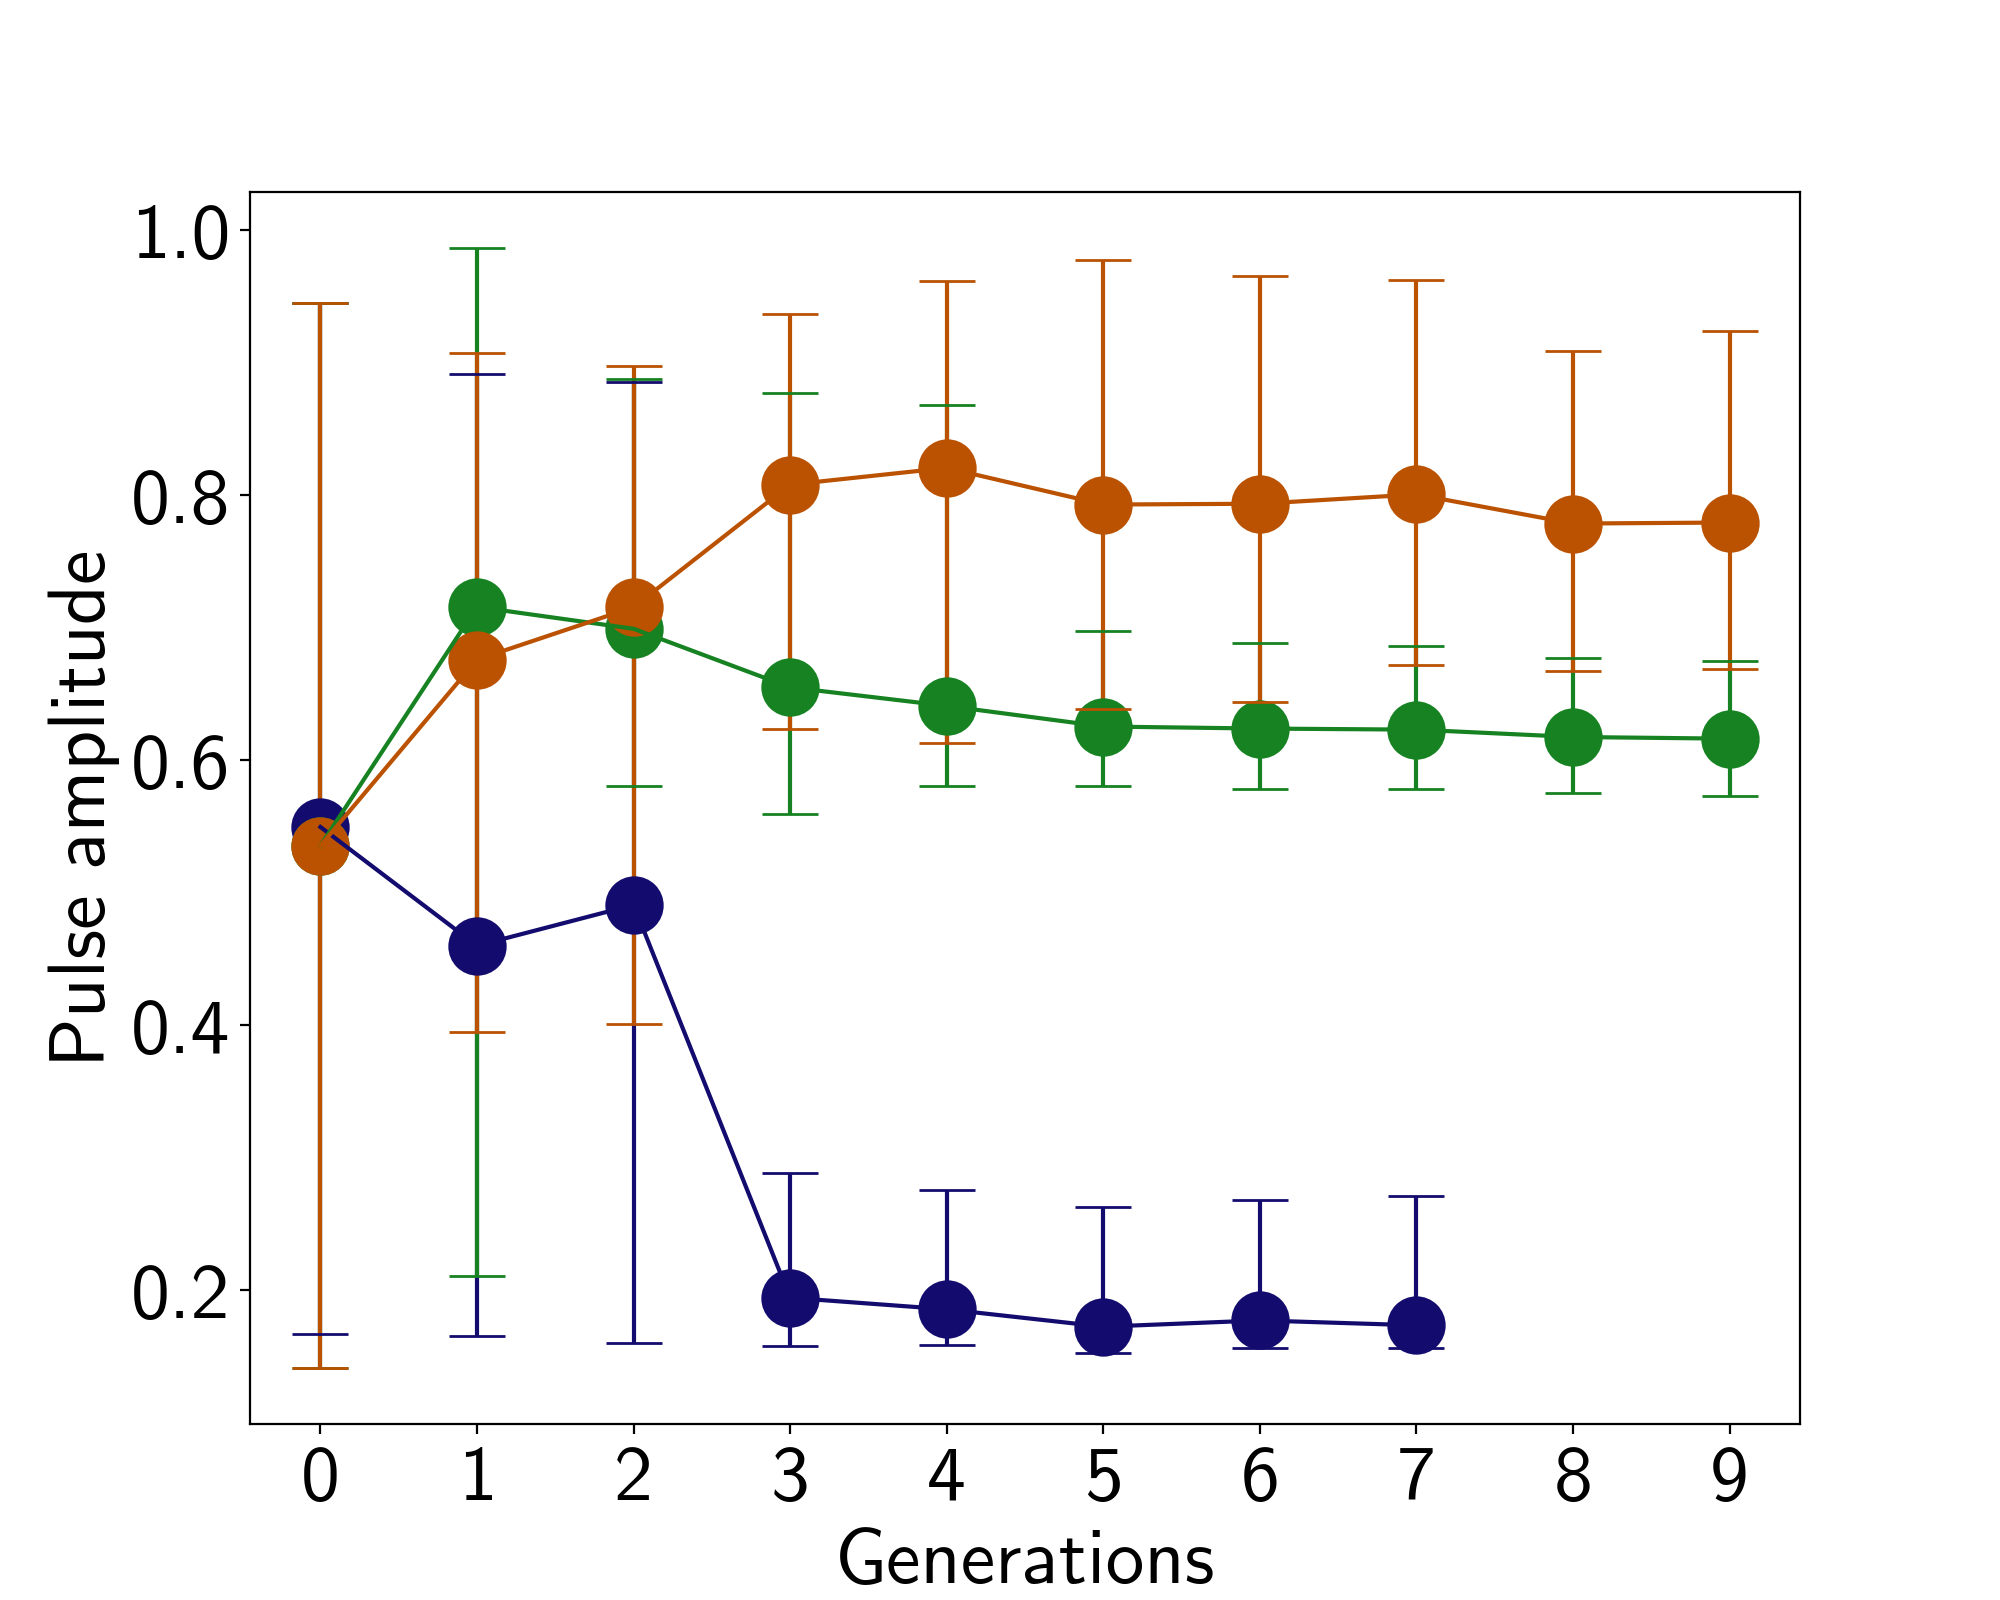

Text(0, 0.5, 'Pulse amplitude')

In [14]:
%matplotlib notebook
fig = plt.figure(figsize=(10,8))

plt.errorbar(gens_lcm, stats_lcm[:, 0], yerr=yerr_lcm, color='#130C6E', capsize=10)
plt.plot(gens_lcm, stats_lcm[:, 0], 'o', markersize=20, color='#130C6E')

plt.errorbar(gens_vcm, stats_vcm[:, 0], yerr=yerr_vcm, color='#178222', capsize=10)
plt.plot(gens_vcm, stats_vcm[:, 0], 'o', markersize=20, color='#178222')

plt.errorbar(gens_hcm, stats_hcm[:, 0], yerr=yerr_hcm, color='#BA5202', capsize=10)
plt.plot(gens_hcm, stats_hcm[:, 0], 'o', markersize=20, color='#BA5202')

plt.xticks(gens_vcm, fontsize=28)
plt.yticks(fontsize=28)
plt.xlabel("Generations", fontsize=28)
plt.ylabel("Pulse amplitude", fontsize=28)
#plt.ylim([-24,210])

In [13]:
# %matplotlib notebook
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# #marker_list = ['o', 'h', 's', 'p', '*']
# marker_list = ['o', 'h', 'p', 's', '^' , 'P', '*']

# #for i in range(7):
# p = ax.scatter(datasets[:, 1], datasets[:, 2], datasets[:, 3]/1000, 
#                c=datasets[:, 4], marker=marker_list[0], s=120, cmap=plt.cm.coolwarm)
# ax.set_xlabel('A')
# ax.set_ylabel('f')
# ax.set_zlabel('T/1000')
# #ax.grid(False)
# plt.rc('font', size=8)
# cbar = fig.colorbar(p, shrink=0.6)
# cbar.set_label('Objective function', labelpad=3) #rotation=270